In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [3]:
y_train,y_test=y_train.flatten(),y_test.flatten()

In [ ]:
y_train.size

50000

In [4]:
x_train,x_test=x_train/255.0,x_test/255.0

In [5]:
from tensorflow.keras.layers import Dense,Input,Conv2D,Flatten,Dropout,BatchNormalization,MaxPooling2D
from tensorflow.keras.models import Model

In [6]:
K=len(set(y_train))

In [ ]:
K

10

In [ ]:
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K,activation='softmax')(x)

model=Model(i,x)

model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',  
        metrics=['accuracy'])

r=model.fit(x_train, y_train,
                    validation_data=(x_test,y_test),
                    epochs=15)

Epoch 1/15
1563/1563 [==============================] - 18s 4ms/step - loss: 1.5297 - accuracy: 0.4440 - val_loss: 1.2453 - val_accuracy: 0.5477
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1993 - accuracy: 0.5711 - val_loss: 1.1050 - val_accuracy: 0.6027
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0435 - accuracy: 0.6304 - val_loss: 1.0121 - val_accuracy: 0.6371
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9338 - accuracy: 0.6713 - val_loss: 0.9367 - val_accuracy: 0.6711
Epoch 5/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8429 - accuracy: 0.6984 - val_loss: 0.9293 - val_accuracy: 0.6733
Epoch 6/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7665 - accuracy: 0.7287 - val_loss: 0.8729 - val_accuracy: 0.6952
Epoch 7/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6994 - accuracy: 0.7508 - val_loss: 0.8598 - val_accuracy

In [ ]:
print("Train score = ",model.evaluate(x_train,y_train))
print("Test score = ",model.evaluate(x_test,y_test))

1563/1563 [==============================] - 4s 3ms/step - loss: 0.1840 - accuracy: 0.9496
Train score =  [0.18400131165981293, 0.9495599865913391]
313/313 [==============================] - 1s 3ms/step - loss: 0.9748 - accuracy: 0.7059
Test score =  [0.9747542142868042, 0.7059000134468079]


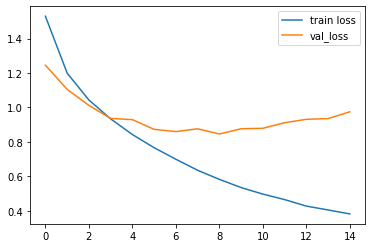

In [ ]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

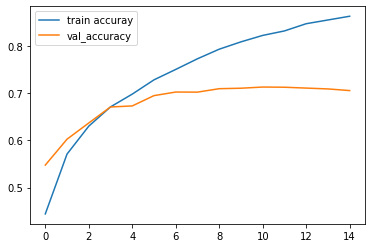

In [ ]:
plt.plot(r.history['accuracy'],label='train accuray')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[715  12  51  25  23   8   7   7 124  28]
 [ 20 823   7   8   6   6   8   2  46  74]
 [ 56   7 627  78  93  52  49  12  15  11]
 [ 15   9  67 539  76 178  64  18  20  14]
 [ 20   2  82  62 699  35  38  46  15   1]
 [ 11   2  69 216  68 568  25  23   9   9]
 [  8   6  48  66  51  20 774   4  14   9]
 [ 19   1  51  59  93  77  12 673   6   9]
 [ 33  17  21  13   4  10   6   2 877  17]
 [ 38  73  14  14  10  12  11  10  54 764]]


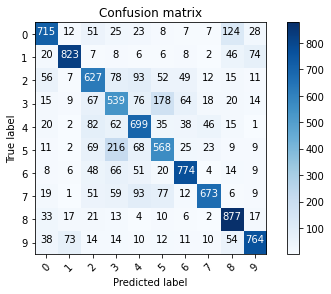

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
      cm=cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
  else: 
    print('Confusion matrix, without normalization')
  
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  fmt='.2f' if normalize else 'd'
  thresh=cm.max() /2.

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment="center",
             color="white" if cm[i,j]>thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [ ]:
labels= ''' airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: truck Predicted automobile')

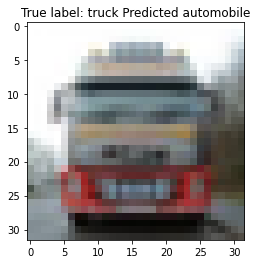

In [ ]:
misclassifies_idx=np.where(p_test !=y_test)[0]
i = np.random.choice(misclassifies_idx)
plt.imshow(x_test[i].reshape(32,32,3 ),cmap='gray')
plt.title("True label: %s Predicted %s" % (labels[y_test[i]],labels[p_test[i]]))

Possiamo migliorare queste performance attraverso la data augmentation


Non vi è la strided convolution, in questi scenari, con piccole immagine, conv seguita da max pooling, sembra funzionare meglio. Inoltre, si è presa ispirazione da VGG dove si mettono più conv prima di fare pooling. 

Same padding, senza l'immagine si rimpicciolirebbe troppo.

Vi è una batch norm dopo ogni conv.


Non ha molto senso usare dropout nella parte di convoluzione. 

In [ ]:
i=Input(shape=x_train[0].shape)

x=Conv2D(32,(3,3),activation='relu',padding='same')(i)
x=BatchNormalization()(x)
x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)


x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)


x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)


x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K,activation='softmax')(x)

model=Model(i,x)

model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',  
        metrics=['accuracy'])

r=model.fit(x_train, y_train,
                    validation_data=(x_test,y_test),
                    epochs=15)

Epoch 1/15
1563/1563 [==============================] - 23s 7ms/step - loss: 1.3348 - accuracy: 0.5332 - val_loss: 1.1422 - val_accuracy: 0.6099
Epoch 2/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8696 - accuracy: 0.6974 - val_loss: 0.8371 - val_accuracy: 0.7137
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7163 - accuracy: 0.7535 - val_loss: 0.8411 - val_accuracy: 0.7163
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6094 - accuracy: 0.7911 - val_loss: 0.7440 - val_accuracy: 0.7556
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5178 - accuracy: 0.8229 - val_loss: 0.6270 - val_accuracy: 0.7882
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4452 - accuracy: 0.8478 - val_loss: 0.6694 - val_accuracy: 0.7837
Epoch 7/15
1563/1563 [==============================] - 12s 7ms/step - loss: 0.3813 - accuracy: 0.8673 - val_loss: 0.5668 - val_ac

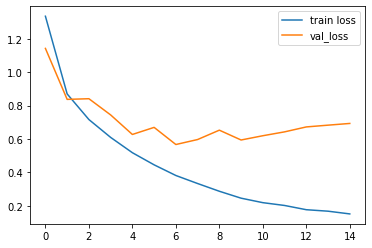

In [ ]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

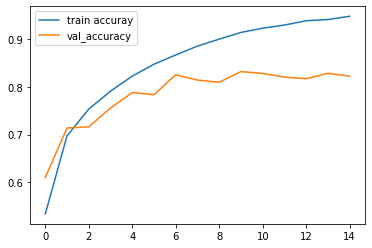

In [ ]:
plt.plot(r.history['accuracy'],label='train accuray')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [7]:
i=Input(shape=x_train[0].shape)

x=Conv2D(32,(3,3),activation='relu',padding='same')(i)
x=BatchNormalization()(x)
x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)


x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)


x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)


x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K,activation='softmax')(x)

model=Model(i,x)

model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',  
        metrics=['accuracy'])


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator=ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
batch_size=32
train_generator=data_generator.flow(x_train,y_train,batch_size)

In [9]:
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit_generator(
    train_generator,
    validation_data=(x_test,y_test),
    steps_per_epoch=steps_per_epoch,
    epochs=50
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


1562/1562 [==============================] - 44s 19ms/step - loss: 1.4219 - accuracy: 0.4999 - val_loss: 1.0052 - val_accuracy: 0.6482
Epoch 2/50
1562/1562 [==============================] - 29s 19ms/step - loss: 1.0051 - accuracy: 0.6472 - val_loss: 1.1839 - val_accuracy: 0.6189
Epoch 3/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.8616 - accuracy: 0.7017 - val_loss: 0.7784 - val_accuracy: 0.7298
Epoch 4/50
1562/1562 [==============================] - 31s 20ms/step - loss: 0.7667 - accuracy: 0.7375 - val_loss: 1.0322 - val_accuracy: 0.6784
Epoch 5/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.6942 - accuracy: 0.7636 - val_loss: 0.7827 - val_accuracy: 0.7364
Epoch 6/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.6517 - accuracy: 0.7801 - val_loss: 0.8879 - val_accuracy: 0.7286
Epoch 7/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.6136 - accuracy: 0.7898 - val_loss: 0.5901 - val_accura

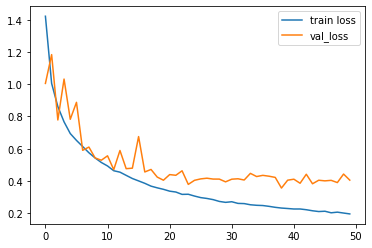

In [10]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

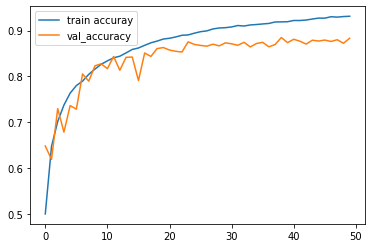

In [11]:
plt.plot(r.history['accuracy'],label='train accuray')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [12]:
labels= ''' airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Confusion matrix, without normalization
[[928   9  13   5   4   2   3   3  19  14]
 [  2 971   1   0   0   0   2   0   0  24]
 [ 34   2 863  20  20  17  32   8   2   2]
 [ 16   3  50 762  29  60  48  15   8   9]
 [ 15   2  35  25 859  10  38  16   0   0]
 [ 10   2  29 107  26 771  26  25   0   4]
 [  6   3  23  16   7   2 941   0   0   2]
 [  7   1  13  21  26   6   2 919   0   5]
 [ 61  21   8   1   0   0   2   3 886  18]
 [ 17  42   1   3   0   0   0   0   3 934]]


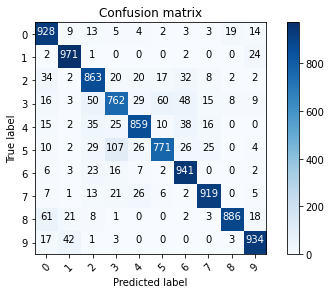

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
      cm=cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
  else: 
    print('Confusion matrix, without normalization')
  
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  fmt='.2f' if normalize else 'd'
  thresh=cm.max() /2.

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment="center",
             color="white" if cm[i,j]>thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

Text(0.5, 1.0, 'True label: dog Predicted deer')

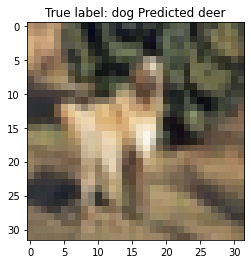

In [17]:
misclassifies_idx=np.where(p_test !=y_test)[0]
i = np.random.choice(misclassifies_idx)
plt.imshow(x_test[i].reshape(32,32,3 ),cmap='gray')
plt.title("True label: %s Predicted %s" % (labels[y_test[i]],labels[p_test[i]]))

In [18]:
model.save('cifar10_model.h5')

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     